In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

# %config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. \
이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

- pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.

아래의 코드를 활용하세요.

```python
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()
```

In [6]:
# 추출 전 전체 데이터에 대해 전처리

# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [7]:
# 단순 무작위 추출 (Simple Random Sampling)
def simple_random_sampling(data, sample_size):
    return data.sample(n=sample_size, random_state=42)

sample = simple_random_sampling(df, 1000)

In [8]:
# 모집단의 TotalPrice
pop_mean = df['TotalPrice'].mean()
pop_std = df['TotalPrice'].std()

# 샘플의 TotalPrice
sample_mean = sample['TotalPrice'].mean()
sample_std = sample['TotalPrice'].std()

print("[모집단]")
print("평균:", pop_mean)
print("표준편차:", pop_std)

print("\n[샘플]")
print("평균:", sample_mean)
print("표준편차:", sample_std)

[모집단]
평균: 17.98779487699964
표준편차: 378.8108235059747

[샘플]
평균: 16.832069999999998
표준편차: 64.46732773087356


[결과 비교]
* 평균 모집단의 평균은 약 17.99이고, 샘플의 평균은 약 16.83임. 평균의 차가 크지 않다는 것은 샘플이 모집단 평균을 잘 대표하고 있음을 시사함.
* 모집단의 표준편차는 약 378.81이고, 샘플의 표준편차는 약 64.47임. 샘플의 표준편차가 모집단의 표준편차보다 훨씬 작음.

[중심극한정리]
* 중심극한정리는 모집단이 어떤 분포를 가지고 있더라도, 충분히 큰 표본을 여러 번 추출하여 표본 평균을 구하면, 이 표본 평균의 분포는 정규분포를 따르게 된다고 정의함.
* 따라서 충분히 큰 수의 표본들을 여러 번 뽑았다면,
    * 표본 평균의 평균은 모집단의 평균으로 수렴하며,
    * 표본 평균의 표준편차는 모집단의 표준편차를 $\sqrt{n}$으로 나눈 값으로 수렴할 것임. (n은 샘플의 수)

[결론]
* 미션1에서는 1,000개의 샘플을 무작위로 추출했으므로
표본 평균의 표준편차는
$$ 378.8108235059747 / \sqrt{1000} ≈ 11.98$$
으로 수렴할 가능성이 큼.
* 위의 샘플의 표준편차가 더 큰 이유는 실제 모집단에서 추출된 특정 샘플이기 때문임. 샘플의 크기와 함께 무작위로 추출된 샘플마다 변동성은 존재함
* 모집단의 특성을 잘 반영하기 위해서는 충분히 큰 표본을 추출하는 것이 중요하며, 모집단과 표본의 평균과 표준편차를 비교함으로써, 표본이 모집단을 얼마나 잘 대표하고 있는지 확인할 수 있음.

## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [9]:
# 주문이 가장 많은 상위 두 국가
df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(2)

Country
United Kingdom    8187806.364
Netherlands        284661.540
Name: TotalPrice, dtype: float64

In [10]:
# 두 국가의 'TotalPrice' 데이터 추출
uk_totalprice = df[df['Country'] == 'United Kingdom']['TotalPrice']
netherlands_totalprice = df[df['Country'] == 'Netherlands']['TotalPrice']

# 두 국가간 'TotalPrice'의 평균
uk_tp_mean = uk_totalprice.mean()
netherlands_tp_mean = netherlands_totalprice.mean()

print(f"United Kingdom 평균: {uk_tp_mean:.2f}")
print(f"Netherlands 평균: {netherlands_tp_mean:.2f}")

United Kingdom 평균: 16.53
Netherlands 평균: 120.06


In [11]:
from scipy import stats

# 독립표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(uk_totalprice, netherlands_totalprice, equal_var=False)
# equal_var if set False, perform Welch’s t-test, which does not assume equal population variance

print(f"\n두 국가 간 'TotalPrice' 평균의 차이 (t-검정):")
print(f"t-통계량: {t_stat:.4f}, p-값: {p_value:.4f}")


두 국가 간 'TotalPrice' 평균의 차이 (t-검정):
t-통계량: -30.2719, p-값: 0.0000


[t-검정(t-test)과 p-값(p-value)]
* t-test는 두 개의 독립적인 표본이 동일한 평균(기대된) 값을 갖는다는 귀무 가설에 대한 검정임.
    * t 검증 사용의 전제조건: 자료를 수치로 나타낼 수 있고, 대표성을 가지고, 정규분포를 띠고, 분산이 일정함
* p-value는 확률분포 그래프에서 극단값의 범위를 설정하여 통계적으로 나오는 결과의 신뢰성을 보여주는 값이며, 0.05 이상일 경우 귀무가설을 기각하고 대립가설을 채택하게 됨.

[가설]
* 귀무가설(H0): 두 국가간 'TotalPrice' 평균의 차이가 통계적으로 유의미하지 않다.
* 대립가설(H1): 두 국가간 'TotalPrice' 평균의 차이는 통계적으로 유의미하다.

[결과 비교]
* t-검정 결과, p-값이 0.0000으로 0.05보다 작기 때문에, 귀무가설을 기각하고 대립가설을 채택함.
* 따라서 두 국가간 'TotalPrice' 평균의 차이는 통계적으로 유의미하다고 결론지을 수 있음.

[1종 오류와 2종 오류]
* 1종 오류 (Type I Error)는 귀무가설이 참인데도 불구하고 이를 기각하는 오류임
    * 해당 미션에서는 두 국가 간 'TotalPrice' 평균에 차이가 없는데도 불구하고 차이가 있다고 결론 내리는 경우에 해당함.
* 2종 오류 (Type II Error)는 실제로는 대립가설이 참인데도 불구하고 귀무가설을 기각하지 않는 오류임.
    * 해당 미션에서는 두 국가 간 'TotalPrice' 평균에 차이가 있는데도 불구하고 차이가 없다고 결론 내리는 경우에 해당함.

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. \
다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

In [12]:
# 'TotalPrice'의 전체 서머리 확인
df['TotalPrice'].describe()

count    541909.000000
mean         17.987795
std         378.810824
min     -168469.600000
25%           3.400000
50%           9.750000
75%          17.400000
max      168469.600000
Name: TotalPrice, dtype: float64

In [13]:
# 'UnitPrice'의 극단값 유추
df.sort_values(by='UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,8,-11062.06
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,8,-11062.06
40984,539750,22652,TRAVEL SEWING KIT,1,2010-12-21 15:40:00,0.00,NaN,United Kingdom,12,0.00
52217,540696,84562A,NaN,1,2011-01-11 09:14:00,0.00,NaN,United Kingdom,1,0.00
52262,540699,POST,NaN,1000,2011-01-11 09:32:00,0.00,NaN,United Kingdom,1,0.00
...,...,...,...,...,...,...,...,...,...,...
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,12,-13541.33
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom,1,-16453.71
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,1,-16888.02
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,12,-17836.46


Description 중 실제 주문과 상관없어 보이는 항목
* 'AMAZON FEE'
* 'Adjust bad debt'

In [14]:
df[df['Description']=='AMAZON FEE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
14514,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom,12,-1.00
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:04:00,13541.33,NaN,United Kingdom,12,-13541.33
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom,12,13541.33
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:34:00,13474.79,NaN,United Kingdom,12,-13474.79
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:41:00,5519.25,NaN,United Kingdom,12,-5519.25
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom,12,-13541.33
16357,C537652,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:51:00,6706.71,NaN,United Kingdom,12,-6706.71
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.02,NaN,United Kingdom,1,-16888.02
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.71,NaN,United Kingdom,1,-16453.71
96844,C544587,AMAZONFEE,AMAZON FEE,-1,2011-02-21 15:07:00,5575.28,NaN,United Kingdom,2,-5575.28


In [15]:
df[df['Description']=='Adjust bad debt']

# 수기 회계 전표로 최종적으로 1회 반영; 역시 주문 내역과는 무관한 점 확인

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,8,11062.06
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,8,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,8,-11062.06


In [16]:
# 위 항목 삭제
print("before", df.shape)
df = df[~df['Description'].isin(['Adjust bad debt', 'AMAZON FEE'])]
print("after", df.shape)

before (541909, 10)
after (541872, 10)


In [17]:
# 다시 정렬
df.sort_values(by='UnitPrice')

# Irregular stock codes seen for items with higher unit prices

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
279310,561271,10080,NaN,170,2011-07-26 12:18:00,0.00,NaN,United Kingdom,7,0.00
441506,574578,40001,check,-240,2011-11-04 17:09:00,0.00,NaN,United Kingdom,11,-0.00
441507,574579,72802B,check,-203,2011-11-04 17:14:00,0.00,NaN,United Kingdom,11,-0.00
140281,548394,82494L,cracked,-39,2011-03-30 17:18:00,0.00,NaN,United Kingdom,3,-0.00
140282,548395,22194,NaN,-9,2011-03-30 17:20:00,0.00,NaN,United Kingdom,3,-0.00
...,...,...,...,...,...,...,...,...,...,...
297723,562955,DOT,DOTCOM POSTAGE,1,2011-08-11 10:14:00,4505.17,NaN,United Kingdom,8,4505.17
173391,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.00,16029.0,United Kingdom,5,-6930.00
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,5,8142.75
173277,C551685,POST,POSTAGE,-1,2011-05-03 12:51:00,8142.75,16029.0,United Kingdom,5,-8142.75


In [18]:
# Make sure all stock codes are in upper case if any
df['StockCode'] = df['StockCode'].astype(str).str.upper()

In [19]:
# Any stock codes that stand out? (non-numerical?)
stockcode_err = df[df['StockCode'].astype(str).str.match('^[a-zA-Z]+$')]
stockcode_err['StockCode'].value_counts()

StockCode
POST         1256
DOT           710
M             572
D              77
S              63
CRUK           16
DCGSSGIRL      13
DCGSSBOY       11
PADS            4
Name: count, dtype: int64

In [20]:
# Explore what the fully alphabetic stock codes could signify
stockcode_err[stockcode_err['StockCode'] == 'S']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
14436,C537581,S,SAMPLES,-1,2010-12-07 12:03:00,12.95,NaN,United Kingdom,12,-12.95
14437,C537581,S,SAMPLES,-1,2010-12-07 12:03:00,52.00,NaN,United Kingdom,12,-52.00
96680,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.74,NaN,United Kingdom,2,-5.74
96681,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,11.08,NaN,United Kingdom,2,-11.08
96682,C544580,S,SAMPLES,-1,2011-02-21 14:25:00,5.79,NaN,United Kingdom,2,-5.79
...,...,...,...,...,...,...,...,...,...,...
414147,C572347,S,SAMPLES,-1,2011-10-24 11:03:00,33.05,NaN,United Kingdom,10,-33.05
419666,572849,S,SAMPLES,1,2011-10-26 12:20:00,33.05,NaN,United Kingdom,10,33.05
480961,C577330,S,SAMPLES,-1,2011-11-18 14:16:00,2.89,NaN,United Kingdom,11,-2.89
480962,C577330,S,SAMPLES,-1,2011-11-18 14:16:00,75.00,NaN,United Kingdom,11,-75.00


* M/m: manual
* D: discount
* S: samples
* CRUK: CRUK Commission (a joint campaign with Cancer Research UK?)
* DCGSSGIRL/DCGSSBOY: seems to be proper products
* PADS: PADS TO MATCH ALL CUSHIONS (unit price 0.001)
* POST: postage (unit price 0)
* DOT: postage (unit price 0)

In [21]:
df = df[~df['StockCode'].isin(['D', 'S', 'PADS', 'POST', 'DOT'])]

In [22]:
df['UnitPrice'].describe()

count    539762.000000
mean          3.704273
std          59.218894
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

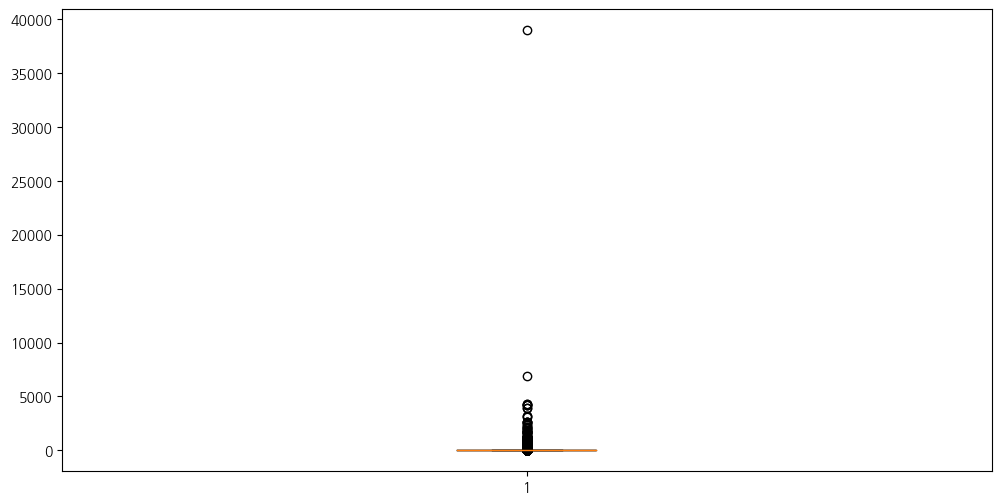

In [23]:
# 극단값 박스플롯으로 확인
plt.figure(figsize=(12, 6))
plt.boxplot(df['UnitPrice'])
plt.show()

In [24]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

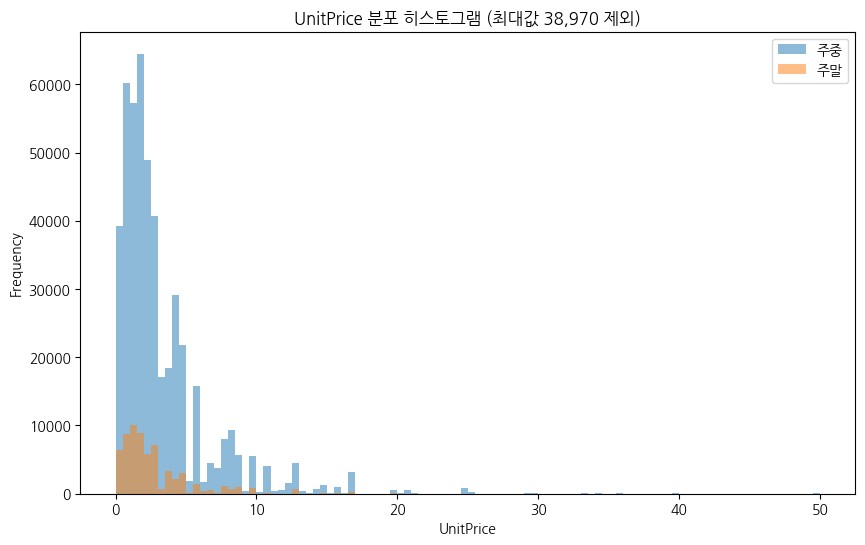

In [25]:
# 주중/주말 'UnitPrice' 히스토그램

plt.figure(figsize=(10, 6))
plt.hist(weekday_data['UnitPrice'], alpha=0.5, label='주중', bins=100, range=(0, 50)) # range 50으로 제한
plt.hist(weekend_data['UnitPrice'], alpha=0.5, label='주말', bins=100, range=(0, 50)) # range 50으로 제한
plt.title('UnitPrice 분포 히스토그램 (최대값 38,970 제외)')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()

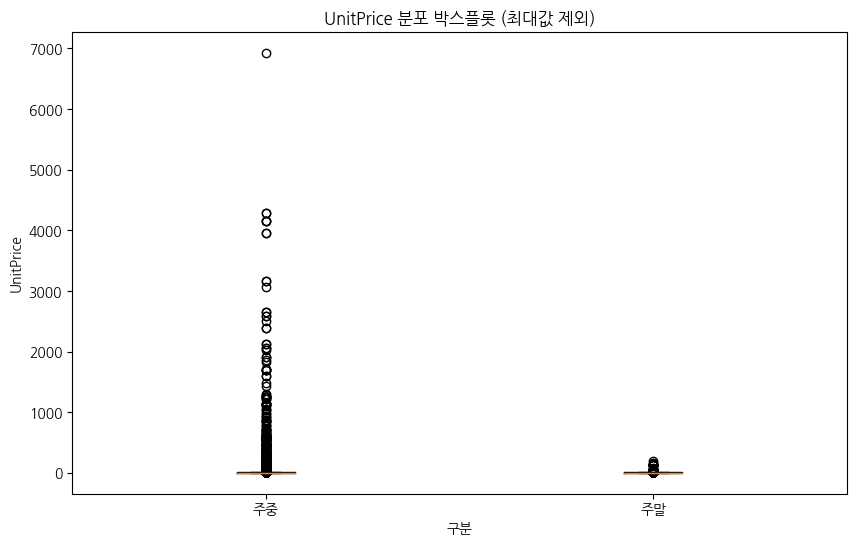

In [26]:
# 'UnitPrice'에서 최대값 제거
weekday_filtered = weekday_data.loc[weekday_data['UnitPrice'] != weekday_data['UnitPrice'].max()]

# 주중/주말 'UnitPrice' 박스플롯
plt.figure(figsize=(10, 6))
plt.boxplot([weekday_filtered['UnitPrice'], weekend_data['UnitPrice']], labels=['주중', '주말'])
plt.title('UnitPrice 분포 박스플롯 (최대값 제외)')
plt.xlabel('구분')
plt.ylabel('UnitPrice')
plt.show()

In [27]:
# 주중과 주말의 기술통계 계산
weekday_stats = weekday_data['UnitPrice'].describe()
weekend_stats = weekend_data['UnitPrice'].describe()

# 분포의 중심경향치(평균, 중간값), Q1/Q3 사분위 수 및 변산성(표준편차, 분산) 계산
weekday_mean = weekday_data['UnitPrice'].mean()
weekday_median = weekday_data['UnitPrice'].median()
weekday_25percentile = weekday_data['UnitPrice'].quantile(0.25)
weekday_75percentile = weekday_data['UnitPrice'].quantile(0.75)
weekday_std = weekday_data['UnitPrice'].std()
weekday_var = weekday_data['UnitPrice'].var()

weekend_mean = weekend_data['UnitPrice'].mean()
weekend_median = weekend_data['UnitPrice'].median()
weekend_25percentile = weekend_data['UnitPrice'].quantile(0.25)
weekend_75percentile = weekend_data['UnitPrice'].quantile(0.75)
weekend_std = weekend_data['UnitPrice'].std()
weekend_var = weekend_data['UnitPrice'].var()

# 기술통계 출력
print("주중 데이터 기술통계:")
print(weekday_stats)
print(f"평균: {weekday_mean:.2f}, 중간값: {weekday_median:.2f}, \
Q1: {weekday_25percentile:.2f}, Q3: {weekday_75percentile:.2f}, \
표준편차: {weekday_std:.2f}, 분산: {weekday_var:.2f}")

print("\n주말 데이터 기술통계:")
print(weekend_stats)
print(f"평균: {weekend_mean:.2f}, 중간값: {weekend_median:.2f}, \
Q1: {weekend_25percentile:.2f}, Q3: {weekend_75percentile:.2f}, \
표준편차: {weekend_std:.2f}, 분산: {weekend_var:.2f}")

주중 데이터 기술통계:
count    475479.000000
mean          3.824536
std          63.080831
min           0.000000
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64
평균: 3.82, 중간값: 2.10, Q1: 1.25, Q3: 4.13, 표준편차: 63.08, 분산: 3979.19

주말 데이터 기술통계:
count    64283.000000
mean         2.814729
std          3.527766
min          0.000000
25%          1.250000
50%          1.790000
75%          3.750000
max        195.000000
Name: UnitPrice, dtype: float64
평균: 2.81, 중간값: 1.79, Q1: 1.25, Q3: 3.75, 표준편차: 3.53, 분산: 12.45


(고객의 주문과 관계 없다고 판단되는 항목을 전처리 과정을 통해 삭제한 후 주중/주말 데이터셋 분리를 진행함)

[결과값 비교]

중심 경향치:
* [주중] 평균: 3.82 / 중간값: 2.10
* [주말] 평균: 2.81 / 중간값: 1.79
* 분석: 두 데이터 세트 모두 평균이 중간값보다 크게 나타나, 데이터가 오른쪽으로 왜도된(right-skewed) 분포를 보여줌. 특히 주중 데이터의 왜도 경향성이 더 짙게 보여짐.

변산성:
* [주중] 분산: 3979.19 / 표준편차: 63.08
* [주말] 분산: 12.45 / 표준편차: 3.53
* 분석: 주중 데이터의 변산성이 주말 데이터보다 훨씬 큼. 이는 주중 거래의 가격 범위가 더 넓고, 극단적인 값들이 더 많이 존재함을 의미함.

분위수:
* [주중] Q1: 1.25 / Q3: 4.13 / IQR: 2.88
* [주말] Q1: 1.25 / Q3: 3.75 / IQR: 2.50
* 분석: 두 데이터 세트의 Q1은 동일하지만, 주중 데이터의 Q3가 더 높음. 이는 주중 거래의 상위 50%가 더 넓은 가격 범위를 가지고 있음을 나타냄.


종합적 해석:
* 주중 거래는 주말 거래보다 더 다양한 가격대를 보이며, 특히 고가의 거래가 더 자주 발생함.
* 두 데이터 세트 모두 오른쪽으로 치우친 분포를 보이지만, 주중 데이터에서 이 특징이 더 두드러짐.
* 주중 데이터에 존재하는 극단적인 고가 거래가 평균과 변산성을 크게 높이고 있음. 반면 주말 거래는 상대적으로 더 일관된 가격대를 보이며, 극단적인 고가 거래가 덜 발생함.


## 미션4) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
이를 이용해 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```

<Axes: xlabel='InvoiceDate', ylabel='TotalPrice'>

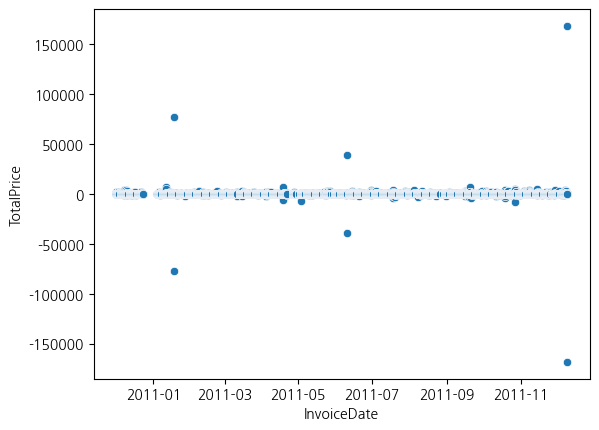

In [28]:
# 전체로 보았을 때 시기별 총 구매 금액
sns.scatterplot(data=df, x='InvoiceDate', y='TotalPrice')

In [29]:
# 큰 값이 발생했으나 모두 취소된 것으로 보이는 거래 발견
df.sort_values(by='TotalPrice').head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,DayOfWeek,WeekEnd
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,12,-168469.6,4,주중
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,1,-77183.6,1,주중
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,6,-38970.0,4,주중


In [30]:
# 취소된 거래 확인
df.sort_values(by='TotalPrice').tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,DayOfWeek,WeekEnd
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098.0,United Kingdom,6,38970.0,4,주중
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,1,77183.6,1,주중
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,12,168469.6,4,주중


In [31]:
top_cancel_idx = df.sort_values(by='TotalPrice').head(3).index.tolist()
bottom_cancel_idx = df.sort_values(by='TotalPrice').tail(3).index.tolist()
cancel_idx = top_cancel_idx + bottom_cancel_idx

In [32]:
df_non_cancelled = df.copy()
print('before', df_non_cancelled.shape)
df_non_cancelled.drop(cancel_idx, inplace=True)
print('after', df_non_cancelled.shape)

before (539762, 12)
after (539756, 12)


<Axes: xlabel='InvoiceDate', ylabel='TotalPrice'>

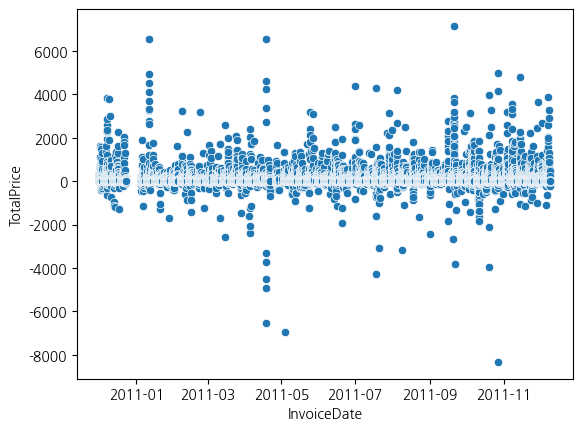

In [33]:
# 취소된 극단값 제외 시기별 총 구매 금액
sns.scatterplot(data=df_non_cancelled, x='InvoiceDate', y='TotalPrice')

In [34]:
# 일부 국가 그룹 지정
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]

In [35]:
# 위 국가만 포함한 데이터셋 새로 정의
country_group_df = df_non_cancelled[df_non_cancelled['Country'].isin(country_group)]
country_group_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,DayOfWeek,WeekEnd
9783,537218,85016,SET OF 6 VINTAGE NOTELETS KIT,6,2010-12-05 15:46:00,2.55,12763.0,Japan,12,15.30,6,주말
9784,537218,21506,"FANCY FONT BIRTHDAY CARD,",12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04,6,주말
9785,537218,22716,CARD CIRCUS PARADE,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04,6,주말
9786,537218,22983,CARD BILLBOARD FONT,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04,6,주말
9787,537218,22030,SWALLOWS GREETING CARD,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04,6,주말
...,...,...,...,...,...,...,...,...,...,...,...,...
536922,C581229,23158,SET OF 5 LUCKY CAT MAGNETS,-36,2011-12-08 10:14:00,2.08,12558.0,USA,12,-74.88,3,주중
536923,C581229,22712,CARD DOLLY GIRL,-12,2011-12-08 10:14:00,0.42,12558.0,USA,12,-5.04,3,주중
536924,C581229,22027,TEA PARTY BIRTHDAY CARD,-12,2011-12-08 10:14:00,0.42,12558.0,USA,12,-5.04,3,주중
536925,C581229,21508,VINTAGE KID DOLLY CARD,-12,2011-12-08 10:14:00,0.42,12558.0,USA,12,-5.04,3,주중


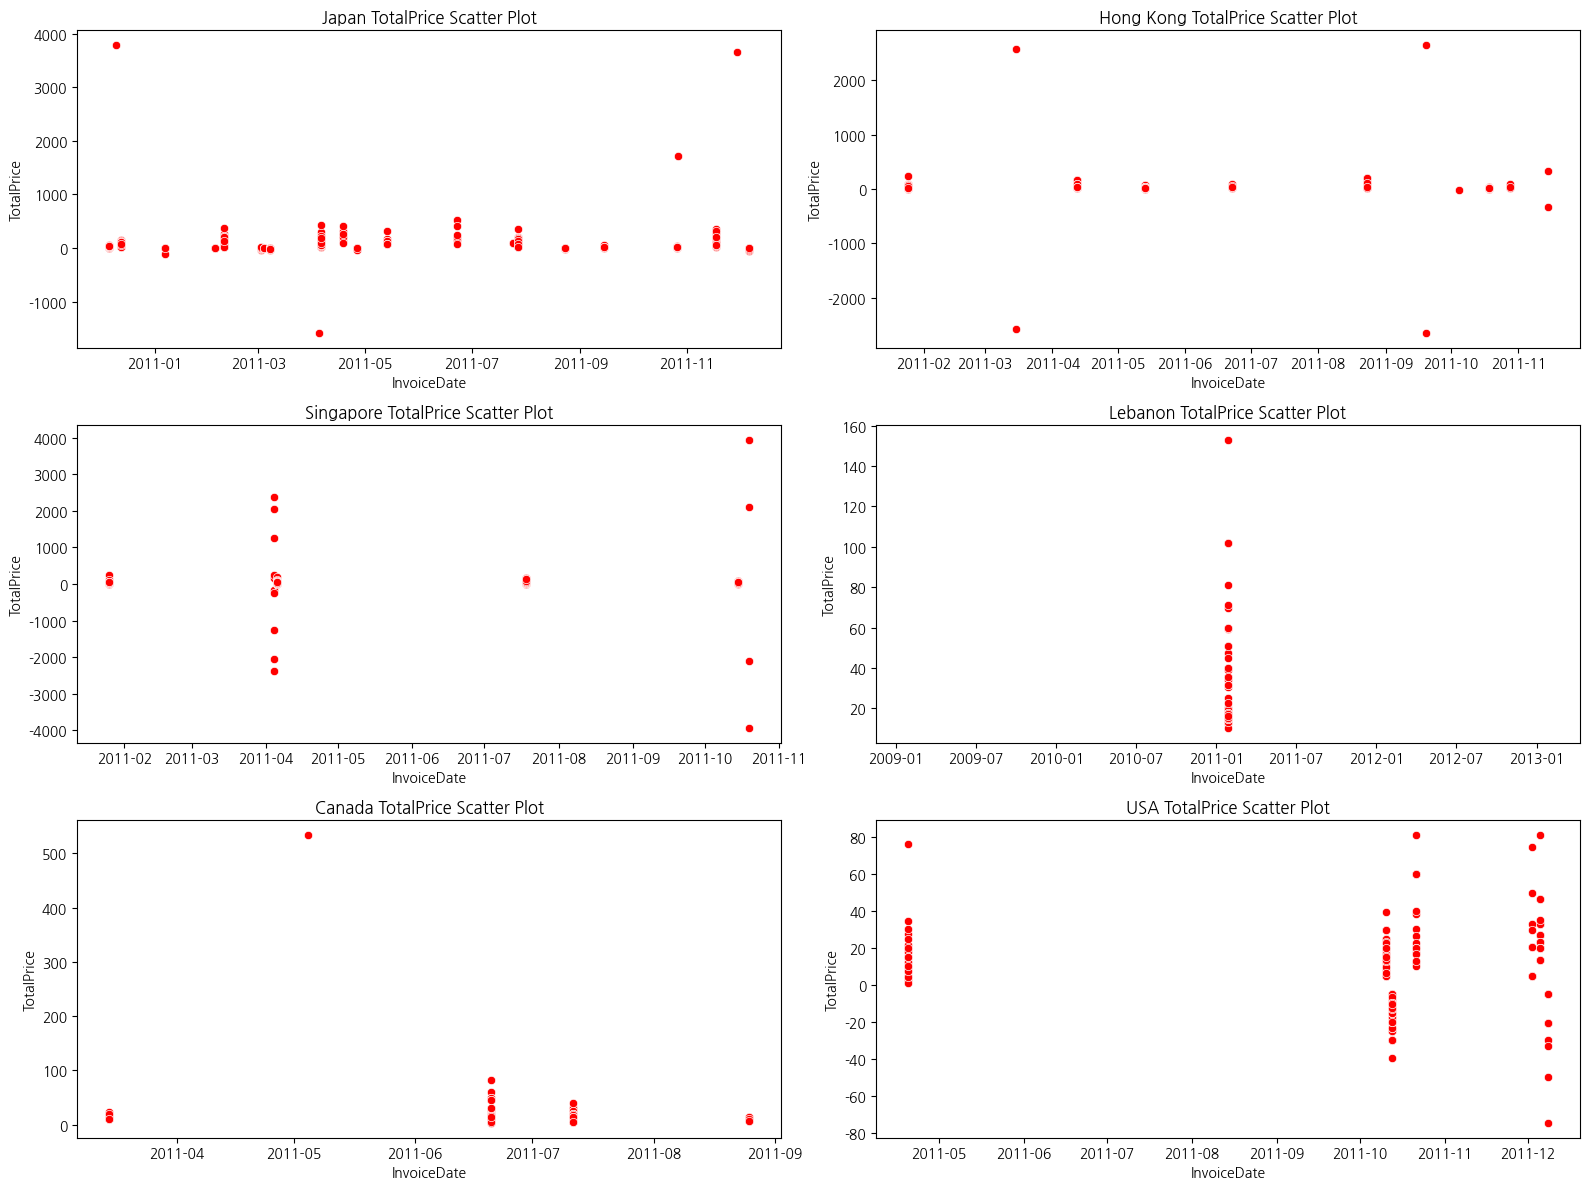

In [36]:
# 국가별 패턴 시각화

fig, axes = plt.subplots(figsize=(16, 4 * 3), nrows=3, ncols=2)
axes = axes.flatten()

# 각 국가별로 산점도 그리기
for i, country in enumerate(country_group):
    sns.scatterplot(data=country_group_df[country_group_df['Country'] == country], x='InvoiceDate', y='TotalPrice', ax=axes[i], color='red')
    axes[i].set_title(f'{country} TotalPrice Scatter Plot')

plt.tight_layout()
plt.show()

[결과 분석]
* 전체 데이터셋 전체로 보았을 때는 특정 시기에 관계없이 전체 기간에 있어서 균일하게 거래가 일어난 것으로 보임.
* 일부 6개 국가를 떼어내 같은 기간 총 거래 금액을 보면 전체 데이터세을 보았을 때는 드러나기 않던 경향성이 드러남.
* 예를 들어 미국은 4-5월 사이 잠시 거래가 있었지만 한동안 없다가 블랙프라이데이, 연말 월은 거래가 다시 활발히 일어났음.
* 레바논은 어떤 프로모션 영향인지, 대외적인 영향이 있었는지는 모르지만 1월에만 반짝 거래가 일어나고 이전과 이후에는 거래가 없었던 것으로 보임.
* 캐나다와 싱가폴도 특정 기간에만 거래가 잠시 발생하는 것이 보임. 이에 비해 일본과 홍콩에서는 좀 더 균일하게 연간 구매가 일어나고 있음.
* 이로써 심슨의 역설이 존재했던 것이 증명됨.

## 미션5) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalPrice)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [37]:
# 결측치 확인
df_non_cancelled.isnull().sum()

InvoiceNo            0
StockCode            0
Description       1449
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      134226
Country              0
InvoiceMonth         0
TotalPrice           0
DayOfWeek            0
WeekEnd              0
dtype: int64

In [38]:
# 'Description'에 결측치가 존재하는 항은 모두 'UnitPrice'가 0인 점을 확인
df_non_cancelled[df_non_cancelled['Description'].isnull()]['UnitPrice'].value_counts()

UnitPrice
0.0    1449
Name: count, dtype: int64

In [93]:
# 'Description' 컬럼에 결측치 있는 데이터 제거
print('before', df_non_cancelled.shape)
df_clean = df_non_cancelled.dropna(subset=['Description'])
print('after', df_clean.shape)

before (539756, 12)
after (538307, 12)


In [40]:
# 'UnitPrice'와 'TotalPrice'에 대한 단순 회귀분석

from scipy import stats

X = df_clean['UnitPrice'].values
y = df_clean['TotalPrice'].values

# 상관계수 계산
corr, p_value = stats.pearsonr(X, y)

print(f"상관계수: {corr:.4f}")
print(f"p-value: {p_value:.4f}")

# 해석
alpha = 0.05
if p_value < alpha:
    print(f"p-value({p_value:.4f})가 {alpha}보다 작으므로, 상관관계가 통계적으로 유의합니다.")
else:
    print(f"p-value({p_value:.4f})가 {alpha}보다 크므로, 상관관계가 통계적으로 유의하지 않습니다.")

상관계수: -0.0662
p-value: 0.0000
p-value(0.0000)가 0.05보다 작으므로, 상관관계가 통계적으로 유의합니다.


[결과 해석]
* 'UnitPrice'와 'TotalPrice'를 각각 독립변수와 종속변수로 회귀분석 결과, 상관계수(pearson correlation coefficient)는 -0.0662이며, p-value는 0.0000임
* 상관계수가 -0.0662로, 이는 두 변수 간에 매우 약한 음의 상관관계가 있음. 다만 일반적으로 상관계수의 절대값이 0.3에서 0.7 사이에 존재할 때 의미가 있는 것으로 보기에 큰 영향력이 있는 변수라고 보여지지는 않음.
* p-value는 0.0000으로 0.05보다 작으므로, 단가와 총 판매액 사이의 상관관계는 통계적으로 유의하다고 판단할 수 있음.

## 미션6) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [41]:
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion_df = df_clean[(df_clean["InvoiceDate"] < "2011-01-01") & df_clean["Description"].notnull()].dropna().copy()
df_promotion_df["IsChristmasPeriod"] = (df_promotion_df["InvoiceDate"] >= "2010-12-17") & (df_promotion_df["InvoiceDate"] <= "2010-12-24")
df_promotion_df["IsChristmasProduct"] = df_promotion_df["Description"].str.lower().str.contains("christmas")
df_promotion_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,DayOfWeek,WeekEnd,IsChristmasPeriod,IsChristmasProduct
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,2,주중,False,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,2,주중,False,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중,False,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중,False,False


In [42]:
# Create extra cross product features of 'IsChristmasPeriod' and 'IsChristmasProduct'

df_promotion_df['IsChristmasPeriod'] = df_promotion_df['IsChristmasPeriod'].astype(int)
df_promotion_df['IsChristmasProduct'] = df_promotion_df['IsChristmasProduct'].astype(int)
df_promotion_df['ChristmasProduct_TotalQuantity'] = df_promotion_df['Quantity'] * df_promotion_df['IsChristmasProduct']
df_promotion_df['ChristmasPeriod_TotalQuantity'] = df_promotion_df['Quantity'] * df_promotion_df['IsChristmasPeriod']
df_promotion_df['ChristmasProduct_TotalPrice'] = df_promotion_df['TotalPrice'] * df_promotion_df['IsChristmasProduct']
df_promotion_df['ChristmasPeriod_TotalPrice'] = df_promotion_df['TotalPrice'] * df_promotion_df['IsChristmasPeriod']

In [43]:
# Create a product database for analysis
by_product_df = df_promotion_df.groupby('Description').agg({
    'IsChristmasProduct': 'first',
    'UnitPrice': 'first',
    'Quantity': 'sum',
    'TotalPrice': 'sum',
    'ChristmasProduct_TotalQuantity': 'sum',
    'ChristmasPeriod_TotalQuantity': 'sum',
    'ChristmasProduct_TotalPrice': 'sum',
    'ChristmasPeriod_TotalPrice': 'sum'
}).sort_values(by='TotalPrice', ascending=False)
by_product_df.head()

,IsChristmasProduct,UnitPrice,Quantity,TotalPrice,ChristmasProduct_TotalQuantity,ChristmasPeriod_TotalQuantity,ChristmasProduct_TotalPrice,ChristmasPeriod_TotalPrice
Description,,,,,,,,
REGENCY CAKESTAND 3 TIER,0.0,10.95,1492,16784.10,0,177,0.0,1958.25
WHITE HANGING HEART T-LIGHT HOLDER,0.0,2.55,3083,8245.65,0,-261,0.0,-620.75
VINTAGE UNION JACK MEMOBOARD,0.0,9.95,1059,6938.49,0,5,0.0,49.75
WOOD BLACK BOARD ANT WHITE FINISH,0.0,6.45,1333,6672.33,0,45,0.0,268.65
BLACK RECORD COVER FRAME,0.0,3.39,1838,6248.82,0,65,0.0,226.47


In [44]:
# Create a customers database for analysis
by_customer_df = df_promotion_df[df_promotion_df['CustomerID'] != 'NA'].groupby('CustomerID').agg({
    'InvoiceNo': 'count',
    'Country': 'first',
    'Quantity': 'sum',
    'TotalPrice': 'sum',
    'ChristmasProduct_TotalQuantity': 'sum',
    'ChristmasPeriod_TotalQuantity': 'sum',
    'ChristmasProduct_TotalPrice': 'sum',
    'ChristmasPeriod_TotalPrice': 'sum'
}).sort_values(by='TotalPrice', ascending=False)
by_customer_df.head()

,InvoiceNo,Country,Quantity,TotalPrice,ChristmasProduct_TotalQuantity,ChristmasPeriod_TotalQuantity,ChristmasProduct_TotalPrice,ChristmasPeriod_TotalPrice
CustomerID,,,,,,,,
18102.0,18,United Kingdom,6695,27834.61,0,0,0.00,0.00
15061.0,124,United Kingdom,9171,19950.66,312,0,452.40,0.00
16029.0,32,United Kingdom,7956,13112.52,0,236,0.00,479.40
14646.0,69,Netherlands,6713,8576.88,0,6713,0.00,8576.88
16210.0,37,United Kingdom,2950,7000.64,396,0,291.48,0.00


In [45]:
top_8countries = by_customer_df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(8).index.tolist()
top_8countries

['United Kingdom',
 'Germany',
 'Netherlands',
 'France',
 'EIRE',
 'Japan',
 'Norway',
 'Sweden']

<Axes: xlabel='Country', ylabel='TotalPrice'>

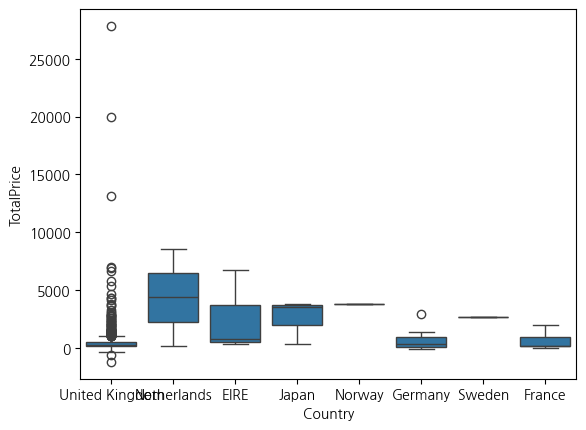

In [46]:
# Purchases throughout December across top 8 countries
top_8_countries_order_df = by_customer_df[by_customer_df['Country'].isin(top_8countries)]
sns.boxplot(data=top_8_countries_order_df, x='Country', y='TotalPrice')

<Axes: xlabel='Country', ylabel='ChristmasProduct_TotalPrice'>

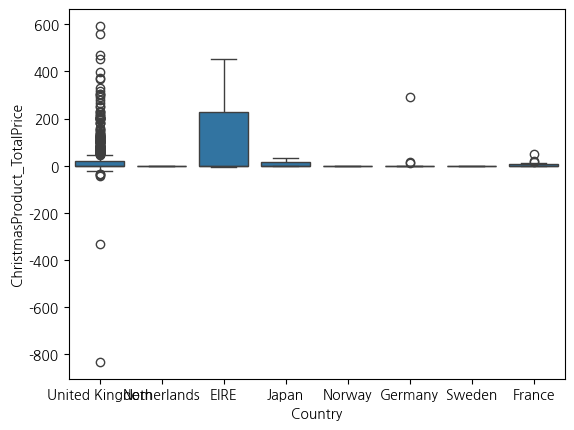

In [47]:
# Christmas product purchases in top 8 countries
sns.boxplot(data=top_8_countries_order_df, x='Country', y='ChristmasProduct_TotalPrice')

<Axes: xlabel='Country', ylabel='ChristmasPeriod_TotalPrice'>

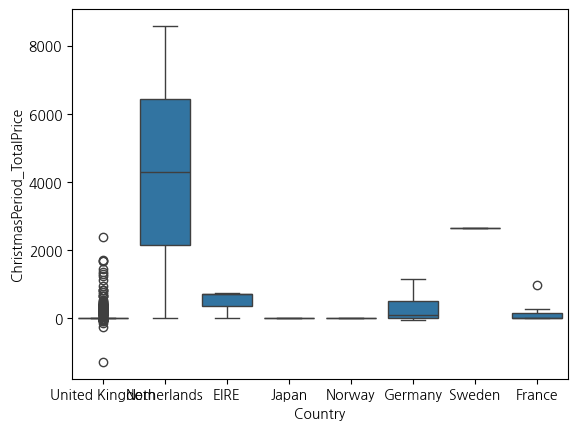

In [48]:
# Christmas period purchases in top 8 countries
sns.boxplot(data=top_8_countries_order_df, x='Country', y='ChristmasPeriod_TotalPrice')

In [49]:
# 크리스마스 제품들 확인
xmas_product_df = by_product_df[by_product_df['IsChristmasProduct']==1].sort_values(by='TotalPrice', ascending=False)
xmas_product_df.head(10)

# Chrismas products not necessarily sold over the Chrismtas period

,IsChristmasProduct,UnitPrice,Quantity,TotalPrice,ChristmasProduct_TotalQuantity,ChristmasPeriod_TotalQuantity,ChristmasProduct_TotalPrice,ChristmasPeriod_TotalPrice
Description,,,,,,,,
PAPER CHAIN KIT 50'S CHRISTMAS,1.0,2.55,1690,4593.50,1690,59,4593.50,158.05
PAPER CHAIN KIT VINTAGE CHRISTMAS,1.0,2.55,1181,3207.95,1181,91,3207.95,232.45
CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,1.0,4.95,304,1418.00,304,12,1418.00,59.40
CHRISTMAS LIGHTS 10 REINDEER,1.0,8.50,108,897.60,108,2,897.60,17.00
FELTCRAFT CHRISTMAS FAIRY,1.0,4.25,182,773.50,182,1,773.50,4.25
SET OF 20 VINTAGE CHRISTMAS NAPKINS,1.0,0.85,783,645.39,783,15,645.39,12.75
15CM CHRISTMAS GLASS BALL 20 LIGHTS,1.0,7.95,73,577.35,73,-6,577.35,-41.70
6 RIBBONS ELEGANT CHRISTMAS,1.0,1.65,387,576.15,387,12,576.15,19.80
60 CAKE CASES VINTAGE CHRISTMAS,1.0,0.55,1123,570.85,1123,48,570.85,26.40


In [50]:
# 크리스마스 기간 중 오더 확인
xmas_orders_df = df_promotion_df[df_promotion_df['IsChristmasPeriod']==1].sort_values(by='TotalPrice', ascending=False)
xmas_orders_df.groupby('Description').agg({
    'TotalPrice': 'sum',
    'IsChristmasProduct':'first'
    }).sort_values(by='TotalPrice', ascending=False).head(20).reset_index()

# Top 20 products ordered in the Christmas period were not Christmas products

,Description,TotalPrice,IsChristmasProduct
0,REGENCY CAKESTAND 3 TIER,1958.25,0.0
1,SCOTTIE DOG HOT WATER BOTTLE,1035.75,0.0
2,KNITTED UNION FLAG HOT WATER BOTTLE,912.81,0.0
3,CHOCOLATE HOT WATER BOTTLE,838.65,0.0
4,PACK OF 72 RETROSPOT CAKE CASES,696.00,0.0
5,RED TOADSTOOL LED NIGHT LIGHT,670.05,0.0
6,CABIN BAG VINTAGE RETROSPOT,650.25,0.0
7,ROUND SNACK BOXES SET OF4 WOODLAND,616.45,0.0
8,HAND WARMER BABUSHKA DESIGN,560.70,0.0
9,FAWN BLUE HOT WATER BOTTLE,544.95,0.0


[Strategy by product/period]
* Most Christmas products don't seem to be in demand over the Christmas period. I would advise that we stock up the inventory ahead of time, before we kick off the December sales.
* The top 20 products ordered over the Christmas period were not Christmas products. It is crucial that we are ready with a range of products that will satisfy our customers' diverse needs.

[Stategy by market]
* UK customers seem to be making most purchases throughout December with some high value orders scattered in the upper half of the sales bracket. The average amount per order is rather small compared to other top countries. I would focus on individuals with high purchasing power in this market.
* Irish customers seem to be purchasing quite evenly within interquantile range, which could serve as a strong customer base.  
* Over the specified Christmas period, I would initiate a promotion for the Dutch customers, where we see the most purchases within that time frame, while making sure we have enough inventory for popular products there.




* 크리스마스 상품 중 크리스마스 기간에 거래된 비율이나, 역으로 크리스마스 기간 중 구입한 크리스마스 제품의 비율은 그리 높지 않음.
* 따라서 프로모션을 적용할 상품군으로 크리스마스 제품을 특정할 필요는 없을 것으로 보임.
* 특히

## 미션7) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
from statsmodels.formula.api import ols

# ols.summary()를 이용해 볼 수 있습니다.
```

In [106]:
import statsmodels.api as sm

# Define predictor variables
X1 = df_promotion_df['IsChristmasProduct']
X2 = df_promotion_df['UnitPrice']
X3 = pd.get_dummies(df_promotion_df['Country'], prefix='Country', drop_first=True).astype(int)  # Convert Country to dummy variables

# Combine predictor variables into one DataFrame or array
X = pd.concat([X1, X2, X3], axis=1)

# Define dependent variable
y = df_promotion_df['Quantity']

# Add constant to predictor variables for intercept
X_with_const = sm.add_constant(X)

In [107]:
# Fit the OLS model
model_sm = sm.OLS(y, X_with_const).fit()

# Print the model summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     11.08
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           1.91e-42
Time:                        08:50:54   Log-Likelihood:            -1.5285e+05
No. Observations:               26773   AIC:                         3.057e+05
Df Residuals:                   26748   BIC:                         3.059e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

[Overall Model Fit]
* R-squared:
    - The model explains only 1% of the variation in Quantity sold, indicating that the chosen predictors (IsChristmasProduct, UnitPrice, Country) explain very little of the variability in sales quantities.
* F-statistic:
    - The F-statistic tests the overall significance of the model. Here, it's statistically significant (p-value = 1.91e-42), suggesting that there is some relationship between the predictors and the quantity sold.

[Individual Coefficients]
* 'IsChristmasProduct':
    - The coefficient (-0.8443) is negative but not statistically significant (p-value = 0.650). This suggests that being a Christmas product does not have a significant impact on the quantity sold during the Christmas period.
* 'UnitPrice':
    - The coefficient (-0.4390) is statistically significant (p-value < 0.001), indicating that higher unit prices are associated with lower quantities sold. This implies price sensitivity among customers.
* 'Countries':
    - Some countries like Finland (coef = 63.5714), Japan (coef = 49.0188), Netherlands (coef = 83.2998), and Sweden (coef = 123.5266) have positive coefficients, indicating higher quantities sold compared to the reference country (presumably United Kingdom).
    - Other countries have coefficients close to zero or negative, suggesting lower quantities sold compared to the reference country.
* Durbin-Watson (1.742) is below 2, suggesting evidence of positive serial correlation.

[Recommendations for Christmas Season Sales Strategy]

1. Product Strategy:
* Christmas Product Promotion: Despite not showing a significant impact in this model, continue to promote and stock up on Christmas-specific products ahead of the season.
* Diversified Product Range: Focus on stocking a diverse range of products beyond Christmas items. The top-selling products during the Christmas period were not necessarily Christmas-related, indicating a broader customer interest.

2. Market Strategy (Country-Specific):
* UK: Focus on increasing the average order value by targeting high-value products or bundling strategies.
* Netherlands, Finland, Sweden, Japan: Strengthen marketing efforts in these countries during the Christmas season due to higher quantities sold.

3. Price Strategy:
* Price Sensitivity: Given the negative coefficient for UnitPrice, consider pricing strategies that balance profitability with maintaining competitive pricing to stimulate demand.

4. Inventory and Logistics:
* Optimize Inventory: Based on sales patterns, ensure sufficient inventory levels for popular products in key markets to meet customer demand during peak periods like Christmas.

5. Marketing and Promotions:
* Segmented Marketing: Use customer segmentation to tailor marketing campaigns, ensuring relevant promotions for different customer segments based on preferences and purchase behaviors observed.

In [114]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산 함수
def calculate_vif(X):
    X_const = add_constant(X)
    vif = pd.DataFrame()
    vif["Variable"] = X_const.columns
    vif["VIF"] = [variance_inflation_factor(X_const.values, i)
                  for i in range(X_const.shape[1])]
    return vif.sort_values("VIF", ascending=False)

# VIF 계산 및 출력
vif_results = calculate_vif(X)
print("VIF 결과:")
print(vif_results)

VIF 결과:
                   Variable         VIF
0                     const  765.519598
24   Country_United Kingdom   58.971062
11          Country_Germany   16.043072
10           Country_France   12.852002
8              Country_EIRE   11.190855
18           Country_Norway    5.172658
20         Country_Portugal    4.239289
4           Country_Belgium    3.559910
6            Country_Cyprus    3.361295
21            Country_Spain    3.106074
17      Country_Netherlands    2.992629
15            Country_Japan    2.850606
23      Country_Switzerland    2.367421
14            Country_Italy    2.111229
16        Country_Lithuania    1.997469
12          Country_Iceland    1.883606
22           Country_Sweden    1.769845
7           Country_Denmark    1.541773
5   Country_Channel Islands    1.485370
9           Country_Finland    1.456597
19           Country_Poland    1.228239
3           Country_Austria    1.228218
13           Country_Israel    1.057065
2                 UnitPrice    1

In [116]:
# 다중공선성 해석
print("\n다중공선성 해석:")
for _, row in vif_results.iterrows():
    if row['Variable'] != 'const':
        if row['VIF'] >= 10:
            print(f"{row['Variable']}: VIF = {row['VIF']:.2f} - 강한 다중공선성 의심")
        elif row['VIF'] >= 5:
            print(f"{row['Variable']}: VIF = {row['VIF']:.2f} - 중간 정도의 다중공선성 의심")
        elif row['VIF'] > 1:
            print(f"{row['Variable']}: VIF = {row['VIF']:.2f} - 약한 다중공선성")
        else:
            print(f"{row['Variable']}: VIF = {row['VIF']:.2f} - 다중공선성 없음")

# 상관계수 행렬 확인
corr_matrix = X.corr()
print("\n상관계수 행렬:")
print(corr_matrix)

# 다중공선성 해결 예시: 높은 VIF를 가진 변수 제거
high_vif_vars = vif_results[vif_results['VIF'] >= 5]['Variable'].tolist()
high_vif_vars = [var for var in high_vif_vars if var != 'const']
X_reduced = X.drop(columns=high_vif_vars)

print("\n다중공선성이 높은 변수 제거 후 VIF 결과:")
print(calculate_vif(X_reduced))


다중공선성 해석:
Country_United Kingdom: VIF = 58.97 - 강한 다중공선성 의심
Country_Germany: VIF = 16.04 - 강한 다중공선성 의심
Country_France: VIF = 12.85 - 강한 다중공선성 의심
Country_EIRE: VIF = 11.19 - 강한 다중공선성 의심
Country_Norway: VIF = 5.17 - 중간 정도의 다중공선성 의심
Country_Portugal: VIF = 4.24 - 약한 다중공선성
Country_Belgium: VIF = 3.56 - 약한 다중공선성
Country_Cyprus: VIF = 3.36 - 약한 다중공선성
Country_Spain: VIF = 3.11 - 약한 다중공선성
Country_Netherlands: VIF = 2.99 - 약한 다중공선성
Country_Japan: VIF = 2.85 - 약한 다중공선성
Country_Switzerland: VIF = 2.37 - 약한 다중공선성
Country_Italy: VIF = 2.11 - 약한 다중공선성
Country_Lithuania: VIF = 2.00 - 약한 다중공선성
Country_Iceland: VIF = 1.88 - 약한 다중공선성
Country_Sweden: VIF = 1.77 - 약한 다중공선성
Country_Denmark: VIF = 1.54 - 약한 다중공선성
Country_Channel Islands: VIF = 1.49 - 약한 다중공선성
Country_Finland: VIF = 1.46 - 약한 다중공선성
Country_Poland: VIF = 1.23 - 약한 다중공선성
Country_Austria: VIF = 1.23 - 약한 다중공선성
Country_Israel: VIF = 1.06 - 약한 다중공선성
UnitPrice: VIF = 1.01 - 약한 다중공선성
IsChristmasProduct: VIF = 1.00 - 약한 다중공선성

상관계수 행렬:
            

In [117]:
# 모델 평가 함수
def evaluate_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42) # X_reduced!

# 전체 특성 사용
all_features_mse, all_features_r2 = evaluate_model(X_train, X_test, y_train, y_test)
print("All Features - MSE: {:.2f}, R2: {:.2f}".format(all_features_mse, all_features_r2))

# 상위 K개 특성 선택 (전진 선택법의 간단한 버전)
# 이 함수는 F-통계량을 기반으로 상위 K개의 가장 중요한 특성을 선택합니다.
def select_k_best_features(X_train, y_train, k):
    selector = SelectKBest(f_regression, k=k)
    selector.fit(X_train, y_train)
    selected_features = X_train.columns[selector.get_support()].tolist()
    return selected_features

# 다양한 k 값으로 실험
for k in [3, 5, 7]:
    selected_features = select_k_best_features(X_train, y_train, k)
    print(f"\nTop {k} features:", selected_features)

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    mse, r2 = evaluate_model(X_train_selected, X_test_selected, y_train, y_test)
    print(f"Top {k} Features - MSE: {mse:.2f}, R2: {r2:.2f}")

All Features - MSE: 1329.64, R2: 0.02

Top 3 features: ['Country_Japan', 'Country_Netherlands', 'Country_Sweden']
Top 3 Features - MSE: 1342.42, R2: 0.01

Top 5 features: ['UnitPrice', 'Country_Finland', 'Country_Japan', 'Country_Netherlands', 'Country_Sweden']
Top 5 Features - MSE: 1329.93, R2: 0.02

Top 7 features: ['UnitPrice', 'Country_Belgium', 'Country_Denmark', 'Country_Finland', 'Country_Japan', 'Country_Netherlands', 'Country_Sweden']
Top 7 Features - MSE: 1329.46, R2: 0.02


In [119]:
from sklearn.feature_selection import RFE, RFECV, SequentialFeatureSelector

# 전체 특성 사용
all_features_mse, all_features_r2 = evaluate_model(X_train, X_test, y_train, y_test)
print("All Features - MSE: {:.2f}, R2: {:.2f}".format(all_features_mse, all_features_r2))

# 전진 선택법
print("\n전진 선택법:")
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=5, direction='forward')
sfs.fit(X_train, y_train)
selected_features = X_train.columns[sfs.get_support()].tolist()
print("Selected features:", selected_features)
X_train_sfs = X_train[selected_features]
X_test_sfs = X_test[selected_features]
mse, r2 = evaluate_model(X_train_sfs, X_test_sfs, y_train, y_test)
print(f"Forward Selection - MSE: {mse:.2f}, R2: {r2:.2f}")

# 후진 제거법 (RFE 사용)
print("\n후진 제거법:")
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_].tolist()
print("Selected features:", selected_features)
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]
mse, r2 = evaluate_model(X_train_rfe, X_test_rfe, y_train, y_test)
print(f"Backward Elimination - MSE: {mse:.2f}, R2: {r2:.2f}")

# 단계적 선택법 (RFECV 사용)
print("\n단계적 선택법:")
rfecv = RFECV(estimator=LinearRegression(), cv=5)
rfecv = rfecv.fit(X_train, y_train)
selected_features = X_train.columns[rfecv.support_].tolist()
print("Selected features:", selected_features)
X_train_rfecv = X_train[selected_features]
X_test_rfecv = X_test[selected_features]
mse, r2 = evaluate_model(X_train_rfecv, X_test_rfecv, y_train, y_test)
print(f"Stepwise Selection - MSE: {mse:.2f}, R2: {r2:.2f}")

All Features - MSE: 1329.64, R2: 0.02

전진 선택법:
Selected features: ['UnitPrice', 'Country_Finland', 'Country_Israel', 'Country_Netherlands', 'Country_Sweden']
Forward Selection - MSE: 1329.95, R2: 0.02

후진 제거법:
Selected features: ['Country_Finland', 'Country_Israel', 'Country_Japan', 'Country_Netherlands', 'Country_Sweden']
Backward Elimination - MSE: 1335.86, R2: 0.01

단계적 선택법:
Selected features: ['IsChristmasProduct', 'UnitPrice', 'Country_Austria', 'Country_Belgium', 'Country_Channel Islands', 'Country_Cyprus', 'Country_Denmark', 'Country_Finland', 'Country_Iceland', 'Country_Israel', 'Country_Italy', 'Country_Japan', 'Country_Lithuania', 'Country_Netherlands', 'Country_Poland', 'Country_Portugal', 'Country_Spain', 'Country_Sweden', 'Country_Switzerland']
Stepwise Selection - MSE: 1329.64, R2: 0.02


In [120]:
import statsmodels.api as sm

# Define predictor variables
X_ = X[['UnitPrice', 'Country_Finland', 'Country_Israel', 'Country_Netherlands', 'Country_Sweden']]

# Define dependent variable
y = df_promotion_df['Quantity']

# Add constant to predictor variables for intercept
X__with_const = sm.add_constant(X_)

In [121]:
# Fit the OLS model
model_sm = sm.OLS(y, X__with_const).fit()

# Print the model summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     44.72
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           3.94e-46
Time:                        09:41:54   Log-Likelihood:            -1.5287e+05
No. Observations:               26773   AIC:                         3.057e+05
Df Residuals:                   26767   BIC:                         3.058e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.0679    

## 미션8) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩 등을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [76]:
# 1) Create target variable

df_promotion_df['Purchased_WHHT'] = np.where(df_promotion_df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER', 1, 0)

In [77]:
# 2) Selecting relevant features

X = df_promotion_df[['UnitPrice', 'Quantity', 'CustomerID', 'Country']]
y = df_promotion_df['Purchased_WHHT']

In [64]:
y.value_counts()

# high target imbalance
# Purchased_WHHT
# 0    26560
# 1      213
# Name: count, dtype: int64

Purchased_WHHT
0    26560
1      213
Name: count, dtype: int64

In [78]:
# 3) One-hot encoding categorical variables

X = pd.get_dummies(X, columns=['Country'], drop_first=True)

In [81]:
# 4) Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [82]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [70]:
# 5) Create and train logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [71]:
# 6) Classification report and confusion matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#               precision    recall  f1-score   support

#            0       0.99      0.64      0.77      5312
#            1       0.01      0.40      0.02        43

#     accuracy                           0.63      5355
#    macro avg       0.50      0.52      0.40      5355
# weighted avg       0.98      0.63      0.77      5355

# [[3375 1937]
#  [  26   17]]

              precision    recall  f1-score   support

           0       0.99      0.64      0.77      5312
           1       0.01      0.40      0.02        43

    accuracy                           0.63      5355
   macro avg       0.50      0.52      0.40      5355
weighted avg       0.98      0.63      0.77      5355

[[3375 1937]
 [  26   17]]


In [92]:
# Improve the result - GridSearchCV

from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Example of GridSearchCV for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced',\
                                              random_state=42), param_grid,\
                                              cv=cv, scoring='f1')
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

# No visible improvement
#               precision    recall  f1-score   support

#            0       0.99      0.64      0.77      5312
#            1       0.01      0.40      0.02        43

#     accuracy                           0.63      5355
#    macro avg       0.50      0.52      0.40      5355
# weighted avg       0.98      0.63      0.77      5355

# [[3375 1937]
#  [  26   17]]

              precision    recall  f1-score   support

           0       0.99      0.64      0.77      5312
           1       0.01      0.40      0.02        43

    accuracy                           0.63      5355
   macro avg       0.50      0.52      0.40      5355
weighted avg       0.98      0.63      0.77      5355

[[3375 1937]
 [  26   17]]


In [90]:
# Improve the result - Ensemble model

from sklearn.ensemble import RandomForestClassifier

# Example of Random Forest classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# A huge improvement from before
#               precision    recall  f1-score   support

#            0       0.99      0.99      0.99      5312
#            1       0.21      0.26      0.23        43

#     accuracy                           0.99      5355
#    macro avg       0.60      0.62      0.61      5355
# weighted avg       0.99      0.99      0.99      5355

# [[5271   41]
#  [  32   11]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5312
           1       0.21      0.26      0.23        43

    accuracy                           0.99      5355
   macro avg       0.60      0.62      0.61      5355
weighted avg       0.99      0.99      0.99      5355

[[5271   41]
 [  32   11]]


# 코멘트
* 라이브 강의로 채워진 몇 일을 지나, 다시 코랩으로 돌아와 문제로 다시 데이터 사이언스를 마주하게 된 것이 리프레싱했습니다.
* 새로 배운 통계 지식을 충분히 잘 썼는지는 모르겠지만, 강사님의 팁이 담긴 영상을 돌려보면서 앞으로 할 프로젝트에 꼭 잘 사용하고 싶습니다.
* 너무 어렵게 생각하기 보다는 시간 제한 속에서 내가 할 수 있는 범위에서 풀이 과정을 기획해나가는 노력이 많이 필요할 것 같습니다.
* 이번에도 많은 응원과 코칭 아끼지 않으신 퍼실님께 감사의 마음 전합니다. 다시 힘내서 해볼게요!